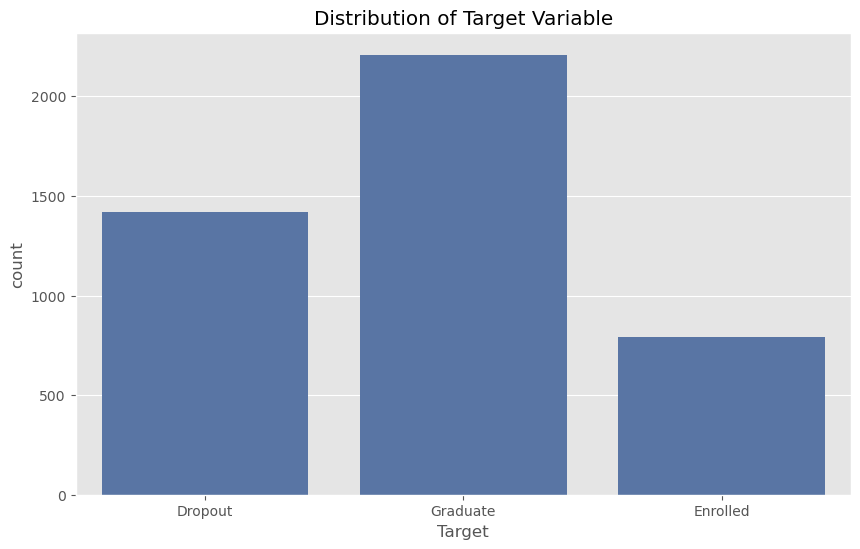

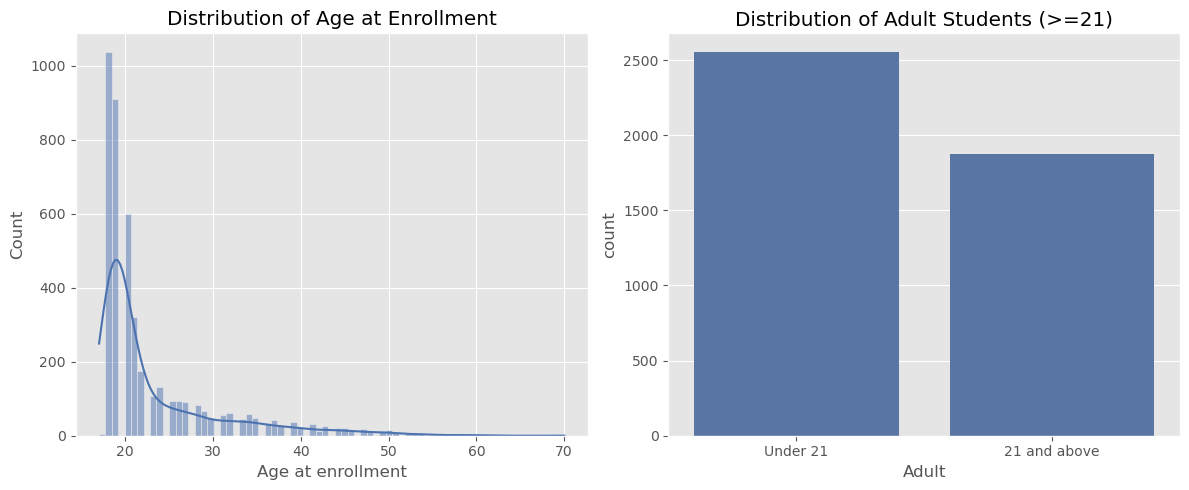

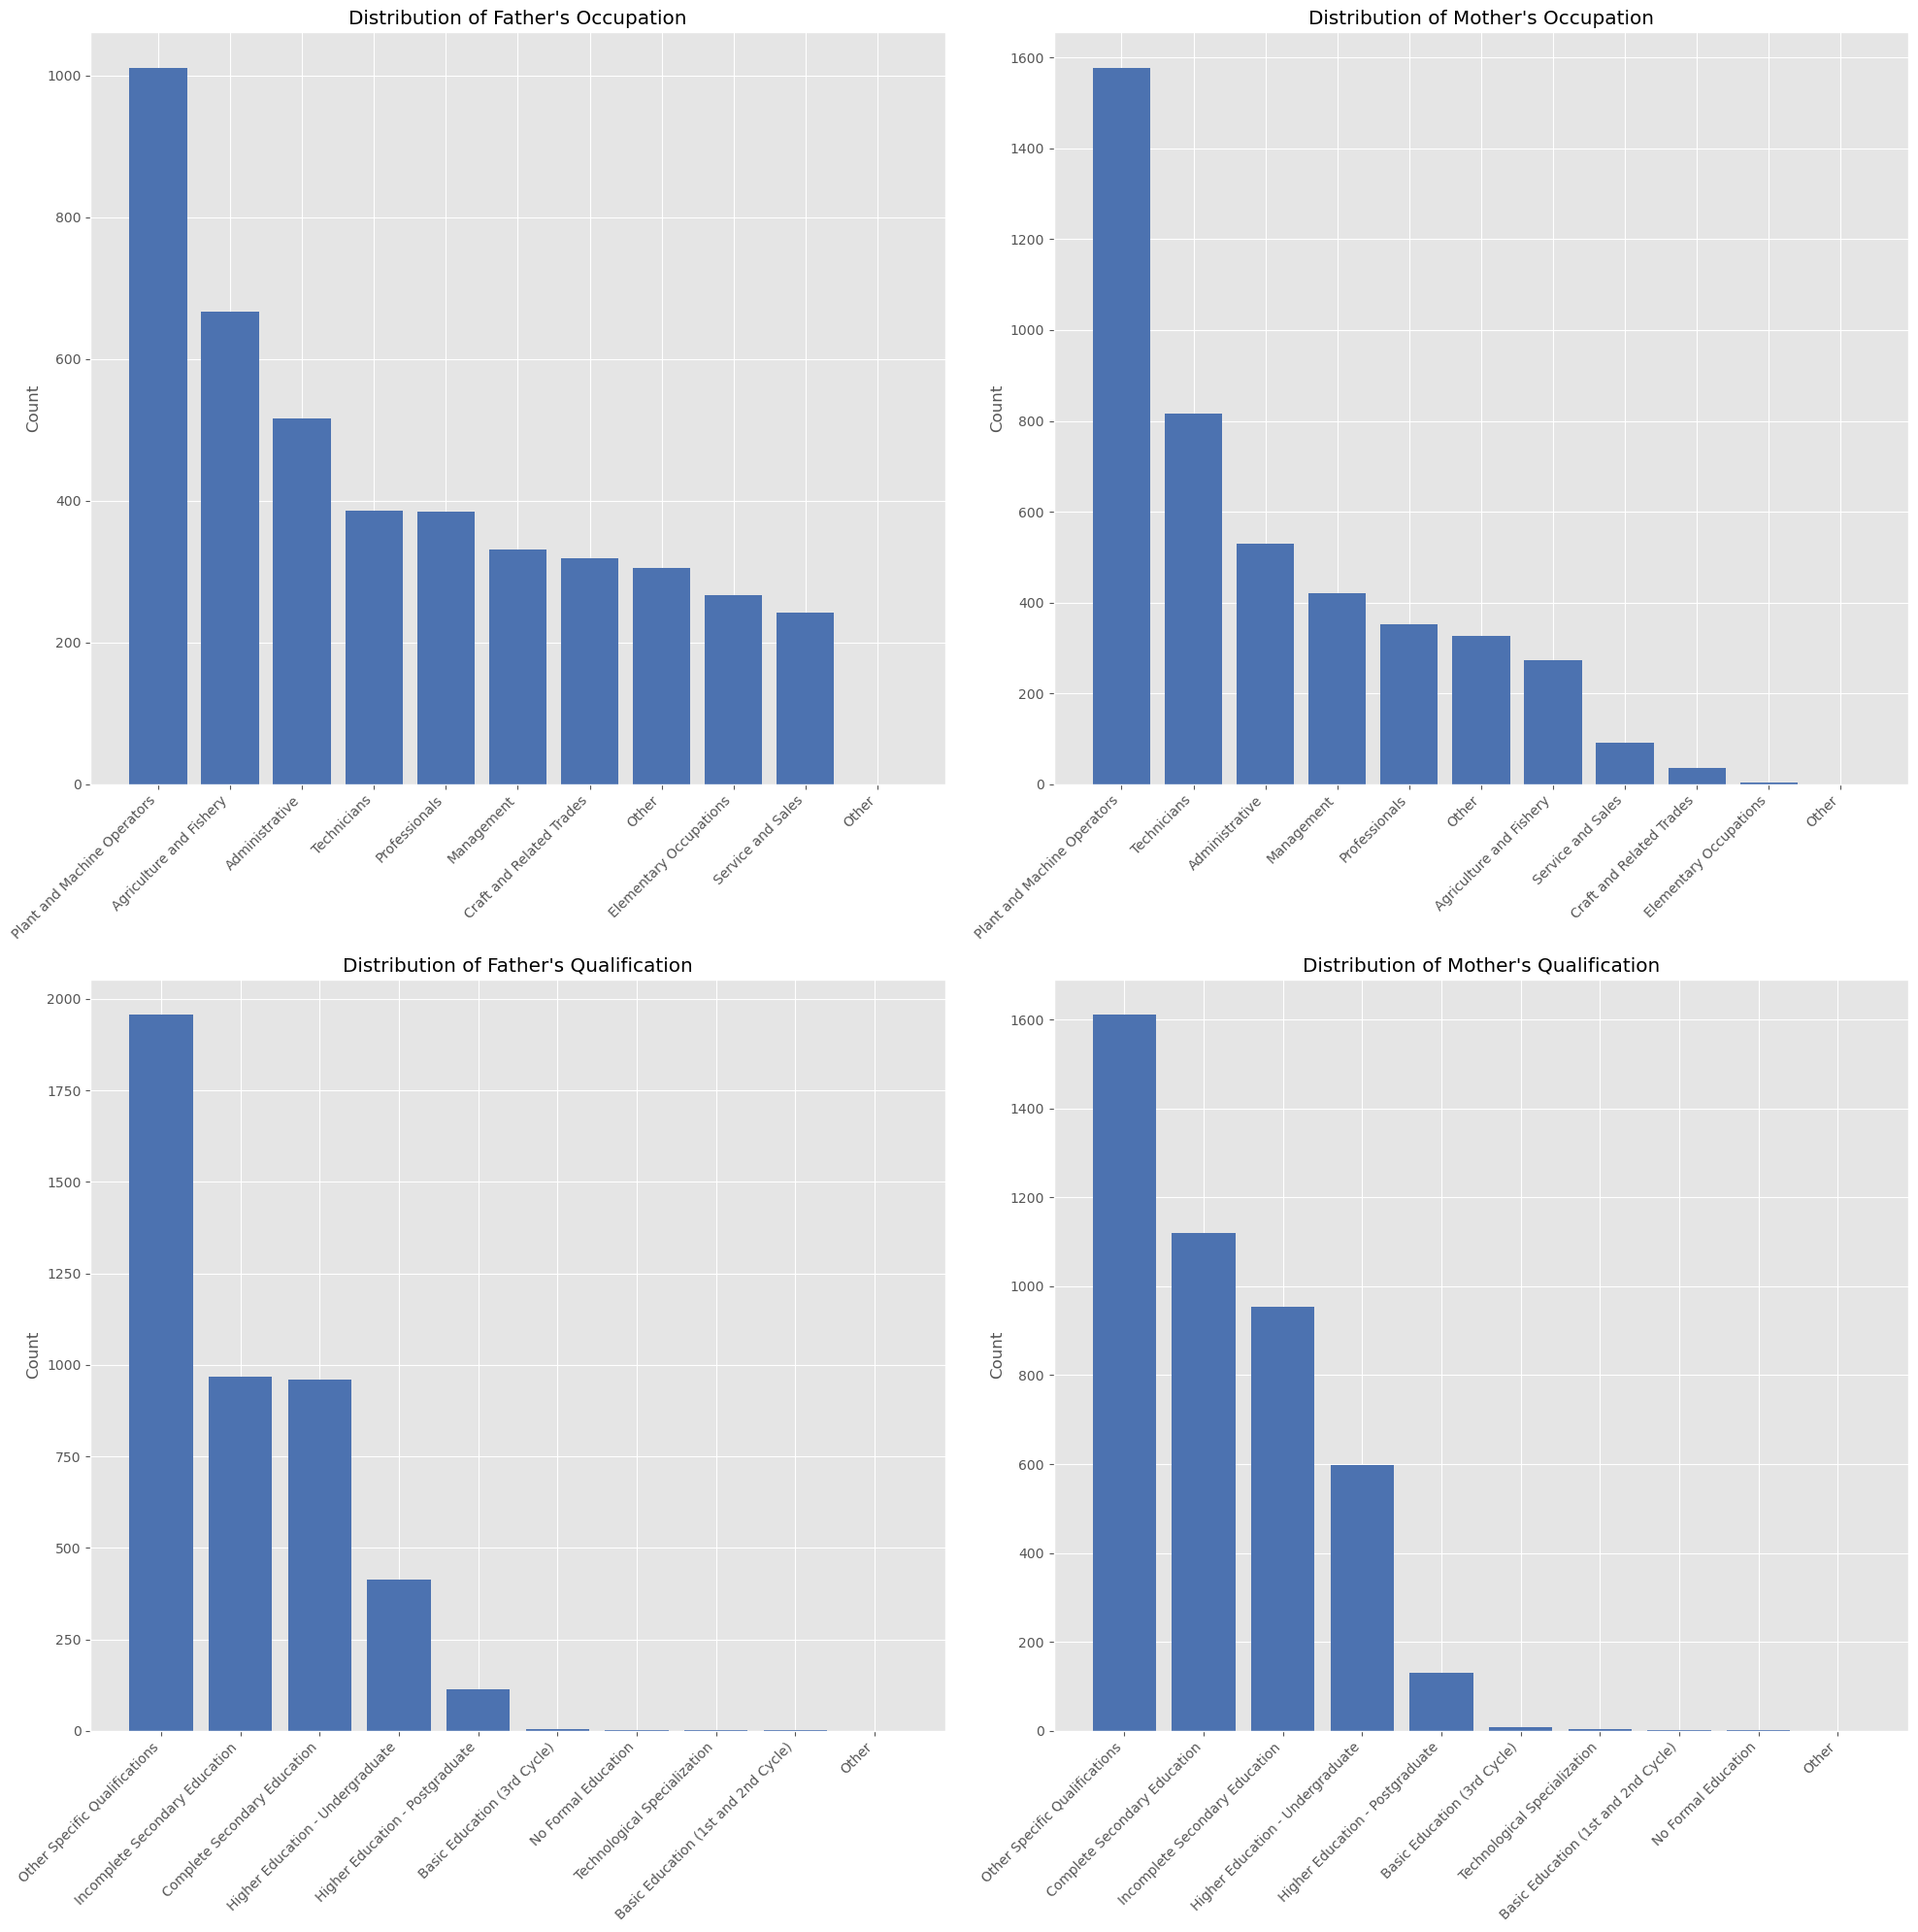

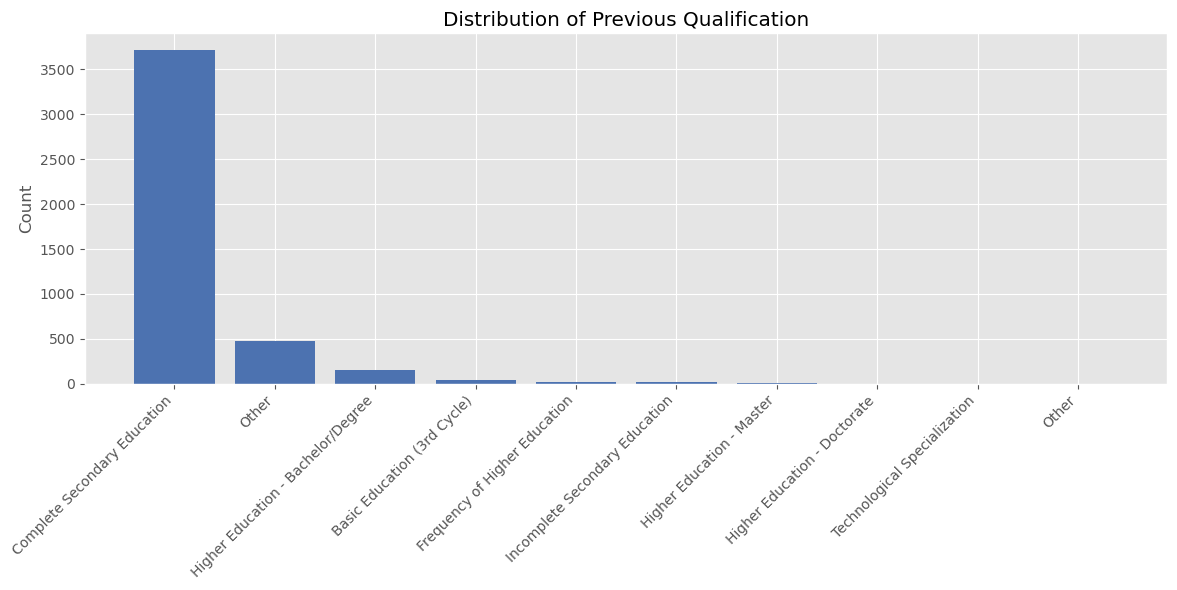

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to categorize occupations
def categorize_occupation(occupation):
    if occupation in [1, 2, 17, 18]:
        return 'Management'
    elif occupation in [3, 19, 20, 21, 22]:
        return 'Professionals'
    elif occupation in [4, 23, 24, 25, 26]:
        return 'Technicians'
    elif occupation in [5, 27, 28, 29]:
        return 'Administrative'
    elif occupation in [6, 30, 31, 32, 33]:
        return 'Service and Sales'
    elif occupation in [7, 34, 35]:
        return 'Agriculture and Fishery'
    elif occupation in [8, 36, 37, 38, 39]:
        return 'Craft and Related Trades'
    elif occupation in [9, 40, 41, 42]:
        return 'Plant and Machine Operators'
    elif occupation in [10, 43, 44, 45, 46]:
        return 'Elementary Occupations'
    elif occupation in [11, 14, 15, 16]:
        return 'Armed Forces'
    else:
        return 'Other'

# function to categorize qualifications
def categorize_qualification(qualification):
    if qualification in [1, 10, 11, 12, 13, 14, 15, 16]:
        return 'Complete Secondary Education'
    elif qualification in [7, 8, 17, 19, 20]:
        return 'Incomplete Secondary Education'
    elif qualification in [2, 3, 4, 5, 6, 30, 31, 32]:
        return 'Higher Education - Undergraduate'
    elif qualification in [33, 34]:
        return 'Higher Education - Postgraduate'
    elif qualification in [27, 28]:
        return 'Basic Education (1st and 2nd Cycle)'
    elif qualification in [9, 18, 21]:
        return 'Basic Education (3rd Cycle)'
    elif qualification == 29:
        return 'Technological Specialization'
    elif qualification in [25, 26]:
        return 'No Formal Education'
    elif qualification == 24:
        return 'Unknown'
    else:
        return 'Other Specific Qualifications'


# New function to categorize previous qualification
def categorize_previous_qualification(qualification):
    if qualification == 1:
        return 'Complete Secondary Education'
    elif qualification in [7, 8, 9, 10, 11]:
        return 'Incomplete Secondary Education'
    elif qualification in [2, 3, 15]:
        return 'Higher Education - Bachelor/Degree'
    elif qualification in [4, 17]:
        return 'Higher Education - Master'
    elif qualification == 5:
        return 'Higher Education - Doctorate'
    elif qualification == 6:
        return 'Frequency of Higher Education'
    elif qualification == 12:
        return 'Basic Education (3rd Cycle)'
    elif qualification == 13:
        return 'Basic Education (2nd Cycle)'
    elif qualification == 14:
        return 'Technological Specialization'
    elif qualification == 16:
        return 'Professional Higher Technical'
    else:
        return 'Other'

# Load the data
df = pd.read_csv('data.csv')

# Set up the plot style
plt.style.use('ggplot')
sns.set_palette("deep")

# Categorize occupations, qualifications, and previous qualification
df['Father\'s occupation category'] = df['Father\'s occupation'].apply(categorize_occupation)
df['Mother\'s occupation category'] = df['Mother\'s occupation'].apply(categorize_occupation)
df['Father\'s qualification category'] = df['Father\'s qualification'].apply(categorize_qualification)
df['Mother\'s qualification category'] = df['Mother\'s qualification'].apply(categorize_qualification)
df['Previous qualification category'] = df['Previous qualification'].apply(categorize_previous_qualification)

# 1. Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# 2. Distribution of treatment (Age at enrollment)
plt.figure(figsize=(12, 5))
# Numerical distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment')
# Binary distribution (above and below 21)
plt.subplot(1, 2, 2)
df['Adult'] = (df['Age at enrollment'] >= 21).astype(int)
sns.countplot(x='Adult', data=df)
plt.title('Distribution of Adult Students (>=21)')
plt.xticks([0, 1], ['Under 21', '21 and above'])
plt.tight_layout()
plt.show()

# 3. Father and mother occupation and qualification
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Helper function for plotting
def plot_top_categories(data, ax, title):
    value_counts = data.value_counts()
    top_5 = value_counts.nlargest(10)
    other = pd.Series({'Other': value_counts.sum() - top_5.sum()})
    plot_data = pd.concat([top_5, other])
    ax.bar(range(len(plot_data)), plot_data.values)
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data.index, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_ylabel('Count')

# Father's occupation category
plot_top_categories(df['Father\'s occupation category'], axs[0, 0], 'Distribution of Father\'s Occupation')

# Mother's occupation category
plot_top_categories(df['Mother\'s occupation category'], axs[0, 1], 'Distribution of Mother\'s Occupation')

# Father's qualification category
plot_top_categories(df['Father\'s qualification category'], axs[1, 0], 'Distribution of Father\'s Qualification')

# Mother's qualification category
plot_top_categories(df['Mother\'s qualification category'], axs[1, 1], 'Distribution of Mother\'s Qualification')

plt.tight_layout()
plt.show()

# 4. Previous qualification
plt.figure(figsize=(12, 6))
plot_top_categories(df['Previous qualification category'], plt.gca(), 'Distribution of Previous Qualification')
plt.tight_layout()
plt.show()